In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Data set Import
df = pd.read_excel('clean_data.xlsx' )
df.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4,1252,2295,4172,5008,9180
1,261695,2021-12-01,1,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,1054,1266,2320
2,261697,2021-12-02,2,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2,420,769,698,840,1538
3,261698,2021-12-02,2,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1,420,769,349,420,769
4,261700,2021-12-03,3,December,2021,24,Youth (<25),F,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 38",1,1252,2295,1043,1252,2295


In [7]:
df.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')

In [17]:
# What are the top-selling bike categories and models?
top_categories = df.groupby("Sub_Category")['Revenue'].sum().sort_values(ascending = False)
top_categories



Sub_Category
Mountain Bikes    336961
Name: Revenue, dtype: int64

In [25]:
# Which states/countries contribute the most revenue?
top_countries = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)
print(top_countries.head(10))  # Top 10 countries
top_states = df.groupby("State")["Revenue"].sum().sort_values(ascending=False)
print(top_states.head(10))  # Top 10 states


Country
United States     123769
Australia         106135
France             46175
Germany            20830
Canada             20080
United Kingdom     19972
Name: Revenue, dtype: int64
State
California             69874
Queensland             39140
New South Wales        38096
Washington             28895
Victoria               27819
Oregon                 25000
Seine (Paris)          20655
British Columbia       20080
England                19972
Nordrhein-Westfalen    11600
Name: Revenue, dtype: int64


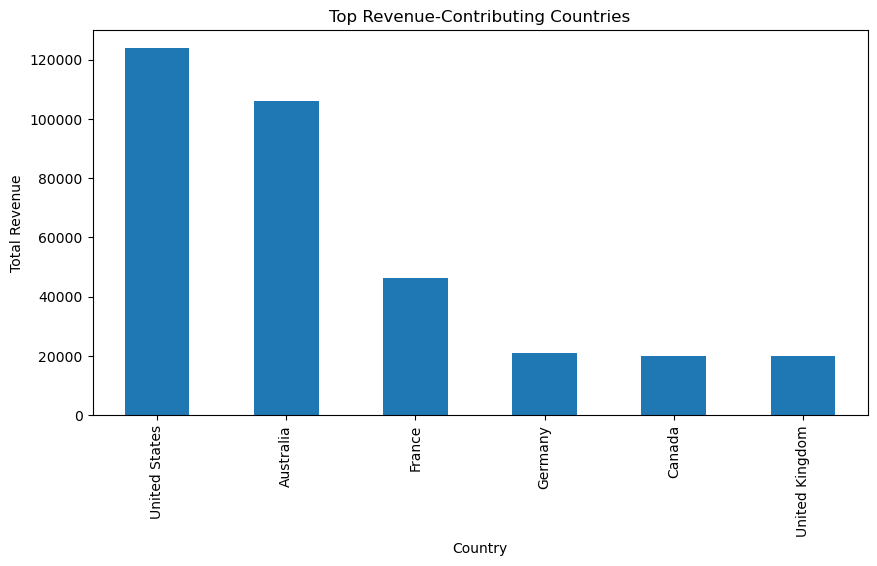

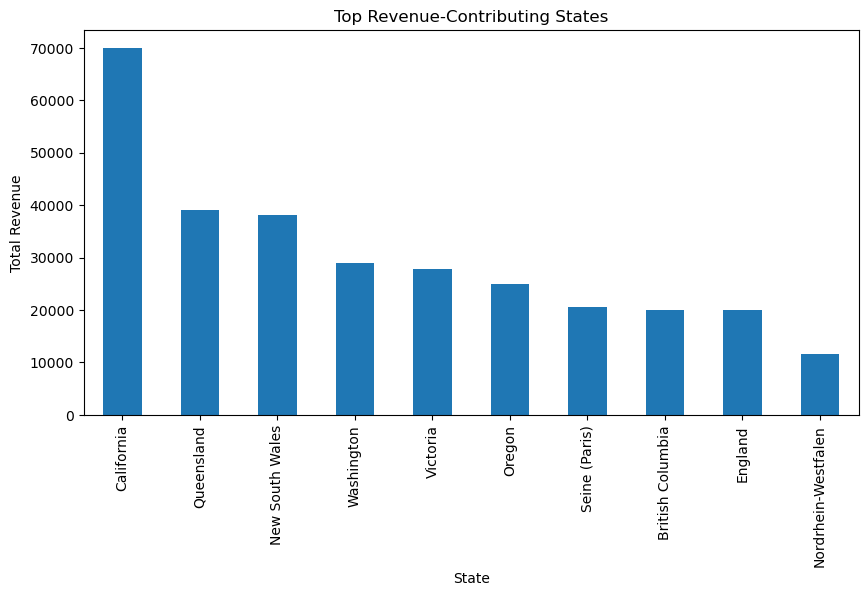

In [29]:
top_countries.plot(kind='bar' , title='Top Revenue-Contributing Countries' , figsize=(10,5))
plt.ylabel("Total Revenue")
plt.show()
top_states.head(10).plot(kind="bar", title="Top Revenue-Contributing States", figsize=(10,5))
plt.ylabel("Total Revenue")
plt.show()


In [35]:
# What are the monthly sales trends?
monthly_sales = df.groupby("Month")["Revenue"].sum()
print(monthly_sales)


Month
December    336961
Name: Revenue, dtype: int64


In [37]:
 df['Age_Group'].unique()

array(['Adults (35-64)', 'Young Adults (25-34)', 'Youth (<25)'],
      dtype=object)

In [45]:
# What is the most common customer age group buying bikes?
bins = [0,24,34,64]
labels = ["Youth (<25)", "Young Adults (25-34)", "Adults (35-64)"]
df['Age_Group'] = pd.cut(df['Customer_Age'] , bins=bins, labels = labels)
age_distribution = df['Age_Group'].value_counts().sort_index()
age_distribution

Age_Group
Youth (<25)             10
Young Adults (25-34)    31
Adults (35-64)          42
Name: count, dtype: int64

Text(0, 0.5, 'Number of Customers')

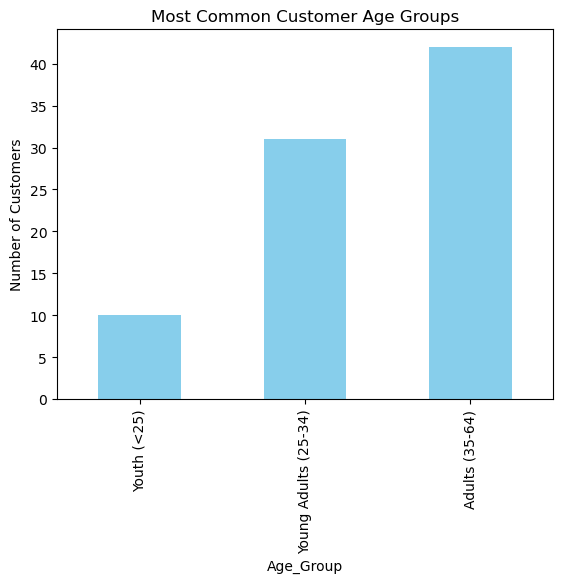

In [47]:

age_distribution.plot(kind='bar' , color='skyblue' , title='Most Common Customer Age Groups')
plt.ylabel("Number of Customers")

In [51]:
gender_counts = df['Customer_Gender'].value_counts()
gender_counts

Customer_Gender
F    47
M    36
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

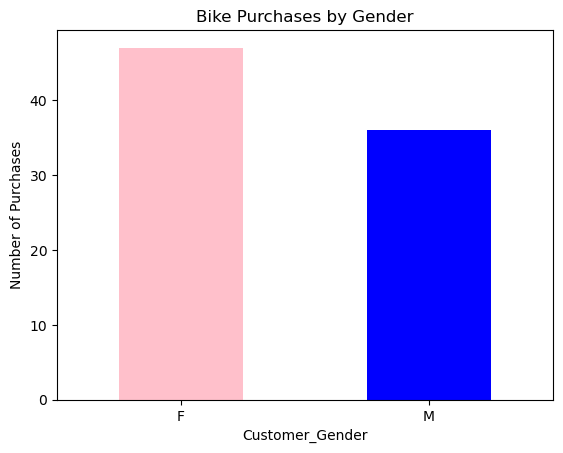

In [53]:
# Do males or females purchase more bikes?
gender_counts.plot(kind='bar' , color =['pink' , 'blue'],title="Bike Purchases by Gender")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=0)

In [59]:
# Which country has the highest profit margins?
country_profit = df.groupby('Country')['Profit'].mean().sort_values(ascending= False)
country_profit

Country
France            2622.625000
United States     1929.413793
Australia         1895.500000
Germany           1892.800000
Canada            1520.500000
United Kingdom    1008.000000
Name: Profit, dtype: float64

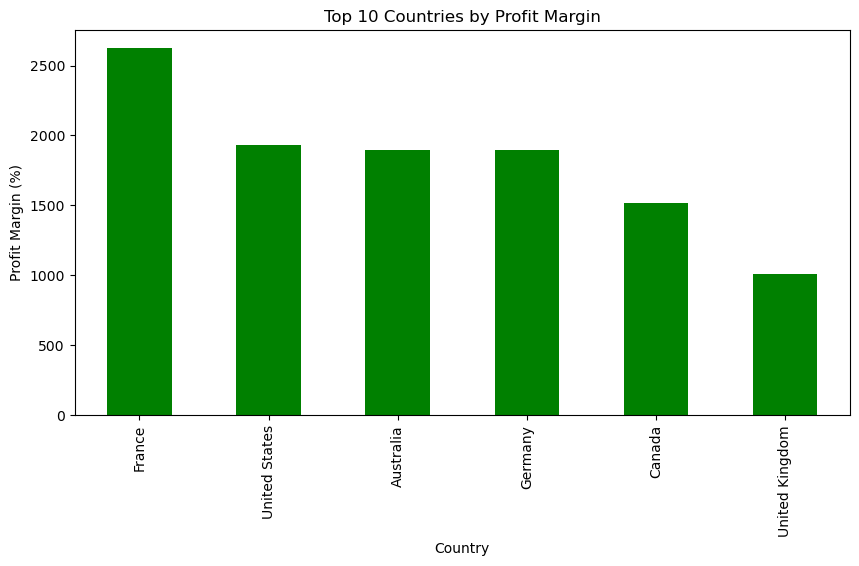

In [61]:
country_profit.head(10).plot(kind="bar", title="Top 10 Countries by Profit Margin", figsize=(10,5), color="green")
plt.ylabel("Profit Margin (%)")
plt.show()


In [65]:
# What is the correlation between unit cost, price, and profit?
correlation_matrix = df[["Unit_Cost", "Unit_Price", "Profit"]].corr()
correlation_matrix

,Unit_Cost,Unit_Price,Profit
Unit_Cost,1.000000,0.994087,0.543958
Unit_Price,0.994087,1.000000,0.531780
Profit,0.543958,0.531780,1.000000


In [67]:
import seaborn as sns


Text(0.5, 1.0, 'Correlation Between Unit Cost, Price, and Profit')

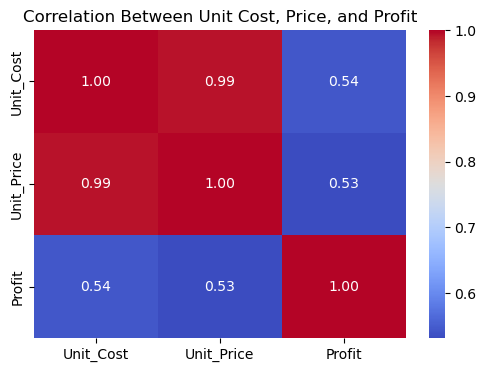

In [71]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Unit Cost, Price, and Profit")